# Análise exploratória dos dados de exportação do RN

## Fonte dos dados
> ![](https://lh4.googleusercontent.com/proxy/fXgKw9x3Ea2Yv-B5CtmnQnFjuRco5o10y3lZahcsz3jBaEmnVUyPKj1EcigqdJAjHz0ZVnITm2Bll7No15Ylxp3ng2EW08BKudKAkJoG)


# Caregando datasets diretamente das planilhas

In [3]:
import pandas as pd

# Carrega excel em um dataframe
dataset_exportacoes_rn_continente = pd.read_excel('../data/V_EXPORTACAO_GERAL_1997-01_2024-12_CONTINENTE_EXCEL.xlsx')
dataset_exportacoes_rn_blocos_economicos = pd.read_excel('../data/V_EXPORTACAO_GERAL_1997-01_2024-12_BLOCOS_ECONOMICOS_EXCEL.xlsx')

# Transformações iniciais do dataset
>1. Removendo a coluna **UF do Produto** pois todos os produtos estão relacionados ao RN
2. Removendo as colunas **Código NCM** e **Descrição NCM** porque optamos ficar com o sistema de descrição SH para codificar e descrever os produtos.
3. Removendo as colunas **Código Seção** e **Descrição Seção** porque já é possível agrupar os produtos usndo o Código SH.

In [4]:
dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.drop(columns=['UF do Produto', 'Código NCM', 'Descrição NCM', 'Código Seção', 'Descrição Seção'])
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.drop(columns=['UF do Produto', 'Código NCM', 'Descrição NCM', 'Código Seção', 'Descrição Seção'])

## Transformando coluna mês em numérico

In [5]:
dataset_exportacoes_rn_blocos_economicos['Mês'] = dataset_exportacoes_rn_blocos_economicos['Mês'].str.extract(r'(\d+)').astype(int)
dataset_exportacoes_rn_continente['Mês'] = dataset_exportacoes_rn_continente['Mês'].str.extract(r'(\d+)').astype(int)

In [6]:
dataset_exportacoes_rn_continente.count()

Ano                       57135
Mês                       57135
Bloco Econômico           57135
Países                    57135
Via                       57135
URF                       57135
Código SH6                57135
Descrição SH6             57135
Código SH4                57135
Descrição SH4             57135
Código SH2                57135
Descrição SH2             57135
Unidade estatística       57135
Valor US$ FOB             57135
Quilograma Líquido        57135
Quantidade Estatística    57135
dtype: int64

## Adicionando nova coluna Data utilizando Mês e Ano

In [7]:
# Renomeando temporariamente as colunas
dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.rename(columns={'Ano': 'year', 'Mês': 'month'})
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.rename(columns={'Ano': 'year', 'Mês': 'month'})

# Criando a coluna 'Mês/Ano' como datetime
dataset_exportacoes_rn_blocos_economicos['Data'] = pd.to_datetime(dataset_exportacoes_rn_blocos_economicos[['year', 'month']].assign(day=1))
dataset_exportacoes_rn_continente['Data'] = pd.to_datetime(dataset_exportacoes_rn_continente[['year', 'month']].assign(day=1))

dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.rename(columns={'year': 'Ano', 'month': 'Mês'})
dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.rename(columns={'year': 'Ano', 'month': 'Mês'})

# Dropa colunas Mês e Ano
# Blocos economicos
#dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.drop("Ano", axis = 1)
#dataset_exportacoes_rn_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.drop("Mês", axis = 1)

# Continentes
#dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.drop("Ano", axis = 1)
#dataset_exportacoes_rn_continente = dataset_exportacoes_rn_continente.drop("Mês", axis = 1)

## Substituir 0 na coluna 'Quantidade Estatística' pelo valor correspondente em 'Quilograma Líquido'

In [8]:
# Substituir 0 na coluna 'Quantidade Estatística' pelo valor correspondente em 'Quilograma Líquido'
dataset_exportacoes_rn_continente['Quantidade Estatística'] = dataset_exportacoes_rn_continente.apply(
    lambda row: row['Quilograma Líquido'] if row['Quantidade Estatística'] == 0 else row['Quantidade Estatística'],
    axis=1
)

## Estatisticas descritivas iniciais das bases de dados

In [9]:
dataset_exportacoes_rn_blocos_economicos.describe()

,Ano,Mês,Código SH6,Código SH4,Código SH2,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data
count,31889.000000,31889.000000,31889.000000,31889.000000,31889.000000,3.188900e+04,3.188900e+04,3.188900e+04,31889
mean,2012.240177,6.602967,285978.747687,2859.466713,28.512622,1.352886e+05,2.055934e+05,7.776450e+04,2012-09-14 23:04:51.824767232
min,1997.000000,1.000000,10190.000000,101.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1997-01-01 00:00:00
25%,2006.000000,3.000000,80711.000000,807.000000,8.000000,3.727000e+03,1.200000e+03,0.000000e+00,2006-07-01 00:00:00
50%,2013.000000,7.000000,152110.000000,1521.000000,15.000000,1.849400e+04,1.130500e+04,1.363000e+03,2013-11-01 00:00:00
75%,2019.000000,10.000000,520932.000000,5209.000000,52.000000,6.778900e+04,4.334000e+04,1.734900e+04,2019-03-01 00:00:00
max,2024.000000,12.000000,999802.000000,9998.000000,99.000000,1.154291e+08,2.021515e+08,3.383300e+07,2024-09-01 00:00:00
std,7.520547,3.511281,255214.860098,2552.131605,25.486074,1.351684e+06,2.315952e+06,5.194471e+05,NaN


In [10]:
dataset_exportacoes_rn_continente.describe()

,Ano,Mês,Código SH6,Código SH4,Código SH2,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data
count,57135.000000,57135.000000,57135.000000,57135.000000,57135.000000,5.713500e+04,5.713500e+04,5.713500e+04,57135
mean,2012.328573,6.604953,275182.027251,2751.457723,27.439415,1.633967e+05,5.897617e+05,4.475427e+05,2012-10-17 06:59:20.115515648
min,1997.000000,1.000000,10190.000000,101.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1997-01-01 00:00:00
25%,2006.000000,4.000000,80450.000000,804.000000,8.000000,5.100000e+03,1.493500e+03,9.170000e+02,2006-07-01 00:00:00
50%,2014.000000,7.000000,170410.000000,1704.000000,17.000000,2.364500e+04,1.294400e+04,9.039000e+03,2014-01-01 00:00:00
75%,2019.000000,10.000000,520929.000000,5209.000000,52.000000,8.637450e+04,4.454300e+04,3.317750e+04,2019-04-01 00:00:00
max,2024.000000,12.000000,999802.000000,9998.000000,99.000000,1.154291e+08,6.116450e+08,6.341000e+08,2024-09-01 00:00:00
std,7.586399,3.480490,250604.279740,2506.041211,25.028828,1.271327e+06,6.669498e+06,6.143353e+06,NaN


## Conferindo os tipos de dados do dataset

In [11]:
#Conferindo os tipos de dados do dataset
print("------------------------------------------------")
print("Tipos presentes no dataset por blocos econômicos")
print("------------------------------------------------")
print(dataset_exportacoes_rn_blocos_economicos.dtypes)
print("------------------------------------------------")
print("Tipos presentes no dataset por continente")
print("------------------------------------------------")
print(dataset_exportacoes_rn_continente.dtypes)

------------------------------------------------
Tipos presentes no dataset por blocos econômicos
------------------------------------------------
Ano                                int64
Mês                                int32
Bloco Econômico                   object
Países                            object
Via                               object
URF                               object
Código SH6                         int64
Descrição SH6                     object
Código SH4                         int64
Descrição SH4                     object
Código SH2                         int64
Descrição SH2                     object
Unidade estatística               object
Valor US$ FOB                      int64
Quilograma Líquido                 int64
Quantidade Estatística             int64
Data                      datetime64[ns]
dtype: object
------------------------------------------------
Tipos presentes no dataset por continente
------------------------------------------------
An

In [12]:
# Dataset por blocos economicos - Mudando o tipo de dados das colunas Código SH6, Código SH4 e Código SH2 de inteiro para String
dataset_exportacoes_rn_blocos_economicos['Código SH6'] = dataset_exportacoes_rn_blocos_economicos['Código SH6'].astype(str)
dataset_exportacoes_rn_blocos_economicos['Código SH4'] = dataset_exportacoes_rn_blocos_economicos['Código SH4'].astype(str)
dataset_exportacoes_rn_blocos_economicos['Código SH2'] = dataset_exportacoes_rn_blocos_economicos['Código SH2'].astype(str)
# Dataset por continente - Mudando o tipo de dados das colunas Código SH6, Código SH4 e Código SH2 de inteiro para String
dataset_exportacoes_rn_continente['Código SH6'] = dataset_exportacoes_rn_continente['Código SH6'].astype(str)
dataset_exportacoes_rn_continente['Código SH4'] = dataset_exportacoes_rn_continente['Código SH4'].astype(str)
dataset_exportacoes_rn_continente['Código SH2'] = dataset_exportacoes_rn_continente['Código SH2'].astype(str)

In [13]:
#Conferindo os tipos de dados do dataset
print("------------------------------------------------")
print("Tipos presentes no dataset por blocos econômicos")
print("------------------------------------------------")
print(dataset_exportacoes_rn_blocos_economicos.dtypes)
print("------------------------------------------------")
print("Tipos presentes no dataset por continente")
print("------------------------------------------------")
print(dataset_exportacoes_rn_continente.dtypes)

------------------------------------------------
Tipos presentes no dataset por blocos econômicos
------------------------------------------------
Ano                                int64
Mês                                int32
Bloco Econômico                   object
Países                            object
Via                               object
URF                               object
Código SH6                        object
Descrição SH6                     object
Código SH4                        object
Descrição SH4                     object
Código SH2                        object
Descrição SH2                     object
Unidade estatística               object
Valor US$ FOB                      int64
Quilograma Líquido                 int64
Quantidade Estatística             int64
Data                      datetime64[ns]
dtype: object
------------------------------------------------
Tipos presentes no dataset por continente
------------------------------------------------
An

In [14]:
#Verificando se existem dados vazios
dados_vazios_dataset_blocos_economicos = dataset_exportacoes_rn_blocos_economicos.isnull().any().any()
dados_vazios_dataset_continentes = dataset_exportacoes_rn_blocos_economicos.isnull().any().any()
print(f"Existem dados vazios no dataset por blocos economicos? {dados_vazios_dataset_blocos_economicos}")
print(f"Existem dados vazios no dataset por continente? {dados_vazios_dataset_continentes}")

Existem dados vazios no dataset por blocos economicos? False
Existem dados vazios no dataset por continente? False


---

# Separando bases por ano

---

In [15]:
def separar_por_ano(df):
    # Dicionário para armazenar dataframes por ano
    dfs_por_ano = {}

    # Extrai o ano da coluna 'Data' e cria uma nova coluna 'Ano'
    df['Ano'] = df['Data'].dt.year

    # Filtra o dataframe por cada ano e armazena no dicionário
    for ano in df['Ano'].unique():
        dfs_por_ano[ano] = df[df['Ano'] == ano]

    return dfs_por_ano


In [16]:
dfs_por_ano_continentes = separar_por_ano(dataset_exportacoes_rn_continente)
dfs_por_ano_blocos_economicos = separar_por_ano(dataset_exportacoes_rn_blocos_economicos)

In [17]:
print(f"Quantidade de datasets obtidos na base por continentes: {len(dfs_por_ano_continentes)}")
print(f"Quantidade de datasets obtidos na base por blocos econômicos: {len(dfs_por_ano_blocos_economicos)}")

Quantidade de datasets obtidos na base por continentes: 28
Quantidade de datasets obtidos na base por blocos econômicos: 28


In [18]:
dfs_por_ano_continentes[2020].describe()

,Ano,Mês,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data
count,2477.0,2477.000000,2.477000e+03,2.477000e+03,2.477000e+03,2477
mean,2020.0,6.499798,1.375533e+05,7.803139e+05,7.318612e+05,2020-06-16 08:17:03.173193472
min,2020.0,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,2020-01-01 00:00:00
25%,2020.0,3.000000,4.792000e+03,1.350000e+03,1.002000e+03,2020-03-01 00:00:00
50%,2020.0,6.000000,2.125400e+04,1.154500e+04,1.003600e+04,2020-06-01 00:00:00
75%,2020.0,10.000000,6.164200e+04,4.600000e+04,4.044400e+04,2020-10-01 00:00:00
max,2020.0,12.000000,3.187868e+07,5.964377e+08,6.341000e+08,2020-12-01 00:00:00
std,0.0,3.666601,8.264396e+05,1.415423e+07,1.496780e+07,NaN


In [19]:
# Agrupando por Categoria e Subcategoria e somando os valores
prod_agrupados = dataset_exportacoes_rn_blocos_economicos.groupby(['Código SH6', 'Descrição SH6'])['Valor US$ FOB'].sum().reset_index()

# Exibindo o DataFrame agrupado
prod_agrupados

,Código SH6,Descrição SH6,Valor US$ FOB
0,100400,Aveia,5400
1,100630,"Arroz semibranqueado ou branqueado, mesmo poli...",303
2,10190,"Animais vivos das espécies cavalar, asinina e ...",12000
3,110100,Farinhas de trigo ou de mistura de trigo com c...,807
4,110423,"Grãos de milho trabalhados (descascados, em pé...",79
...,...,...,...
964,970300,Produções originais de arte estatuária ou de e...,309
965,970390,"Outras esculturas e estatuárias originais, em ...",1002
966,970500,"Coleções e espécimes para coleções, de zoologi...",5230
967,999801,Consumo de bordo (combustíveis e lubrificantes...,1029641


# Exportações por valor US$ FOB por mês de cada ano da série temporal completa

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def plot_annual_charts_with_global_scale(dataframes_dict, column='Valor US$ FOB'):
    """
    Plota gráficos de linha mostrando o valor total de uma coluna específica por mês para cada ano,
    todos com a mesma escala de acordo com o valor mínimo e máximo global da coluna.

    Parâmetros:
    - dataframes_dict: dicionário com dataframes, onde as chaves são os anos.
    - column: coluna para calcular o total por mês e exibir nos gráficos.
    """
    # Calcula o valor mínimo e máximo global para a coluna especificada
    all_values = pd.concat([df[column] for df in dataframes_dict.values()])
    global_min = all_values.min()
    global_max = all_values.max()

    num_years = len(dataframes_dict)
    cols = 4  # Número de colunas para organizar os gráficos
    rows = math.ceil(num_years / cols)  # Calcula o número de linhas necessário

    fig, axs = plt.subplots(rows, cols, figsize=(20, rows * 5))
    fig.suptitle(f'Total mensal da coluna "{column}" de 1997 a 2024 com escala global', fontsize=16)

    # Ordena os anos para garantir que os gráficos estão na sequência
    sorted_years = sorted(dataframes_dict.keys())

    for i, year in enumerate(sorted_years):
        row = i // cols
        col = i % cols
        df_year = dataframes_dict[year]

        # Agrupa os dados por mês e calcula o total da coluna especificada por mês
        monthly_totals = df_year.groupby('Mês')[column].sum()

        # Gera o gráfico de linha para o ano atual com a escala global
        axs[row, col].plot(monthly_totals.index, monthly_totals.values, color='skyblue', linestyle='-')
        axs[row, col].set_title(f'Ano {year}')
        axs[row, col].set_xlabel('Mês')
        axs[row, col].set_ylabel(column)
        axs[row, col].tick_params(axis='x', rotation=45)
        axs[row, col].set_ylim(global_min, global_max)  # Define a escala global para todos os gráficos

    # Remove os subplots vazios, caso existam
    for j in range(i + 1, rows * cols):
        fig.delaxes(axs[j // cols, j % cols])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta layout para o título geral
    plt.show()


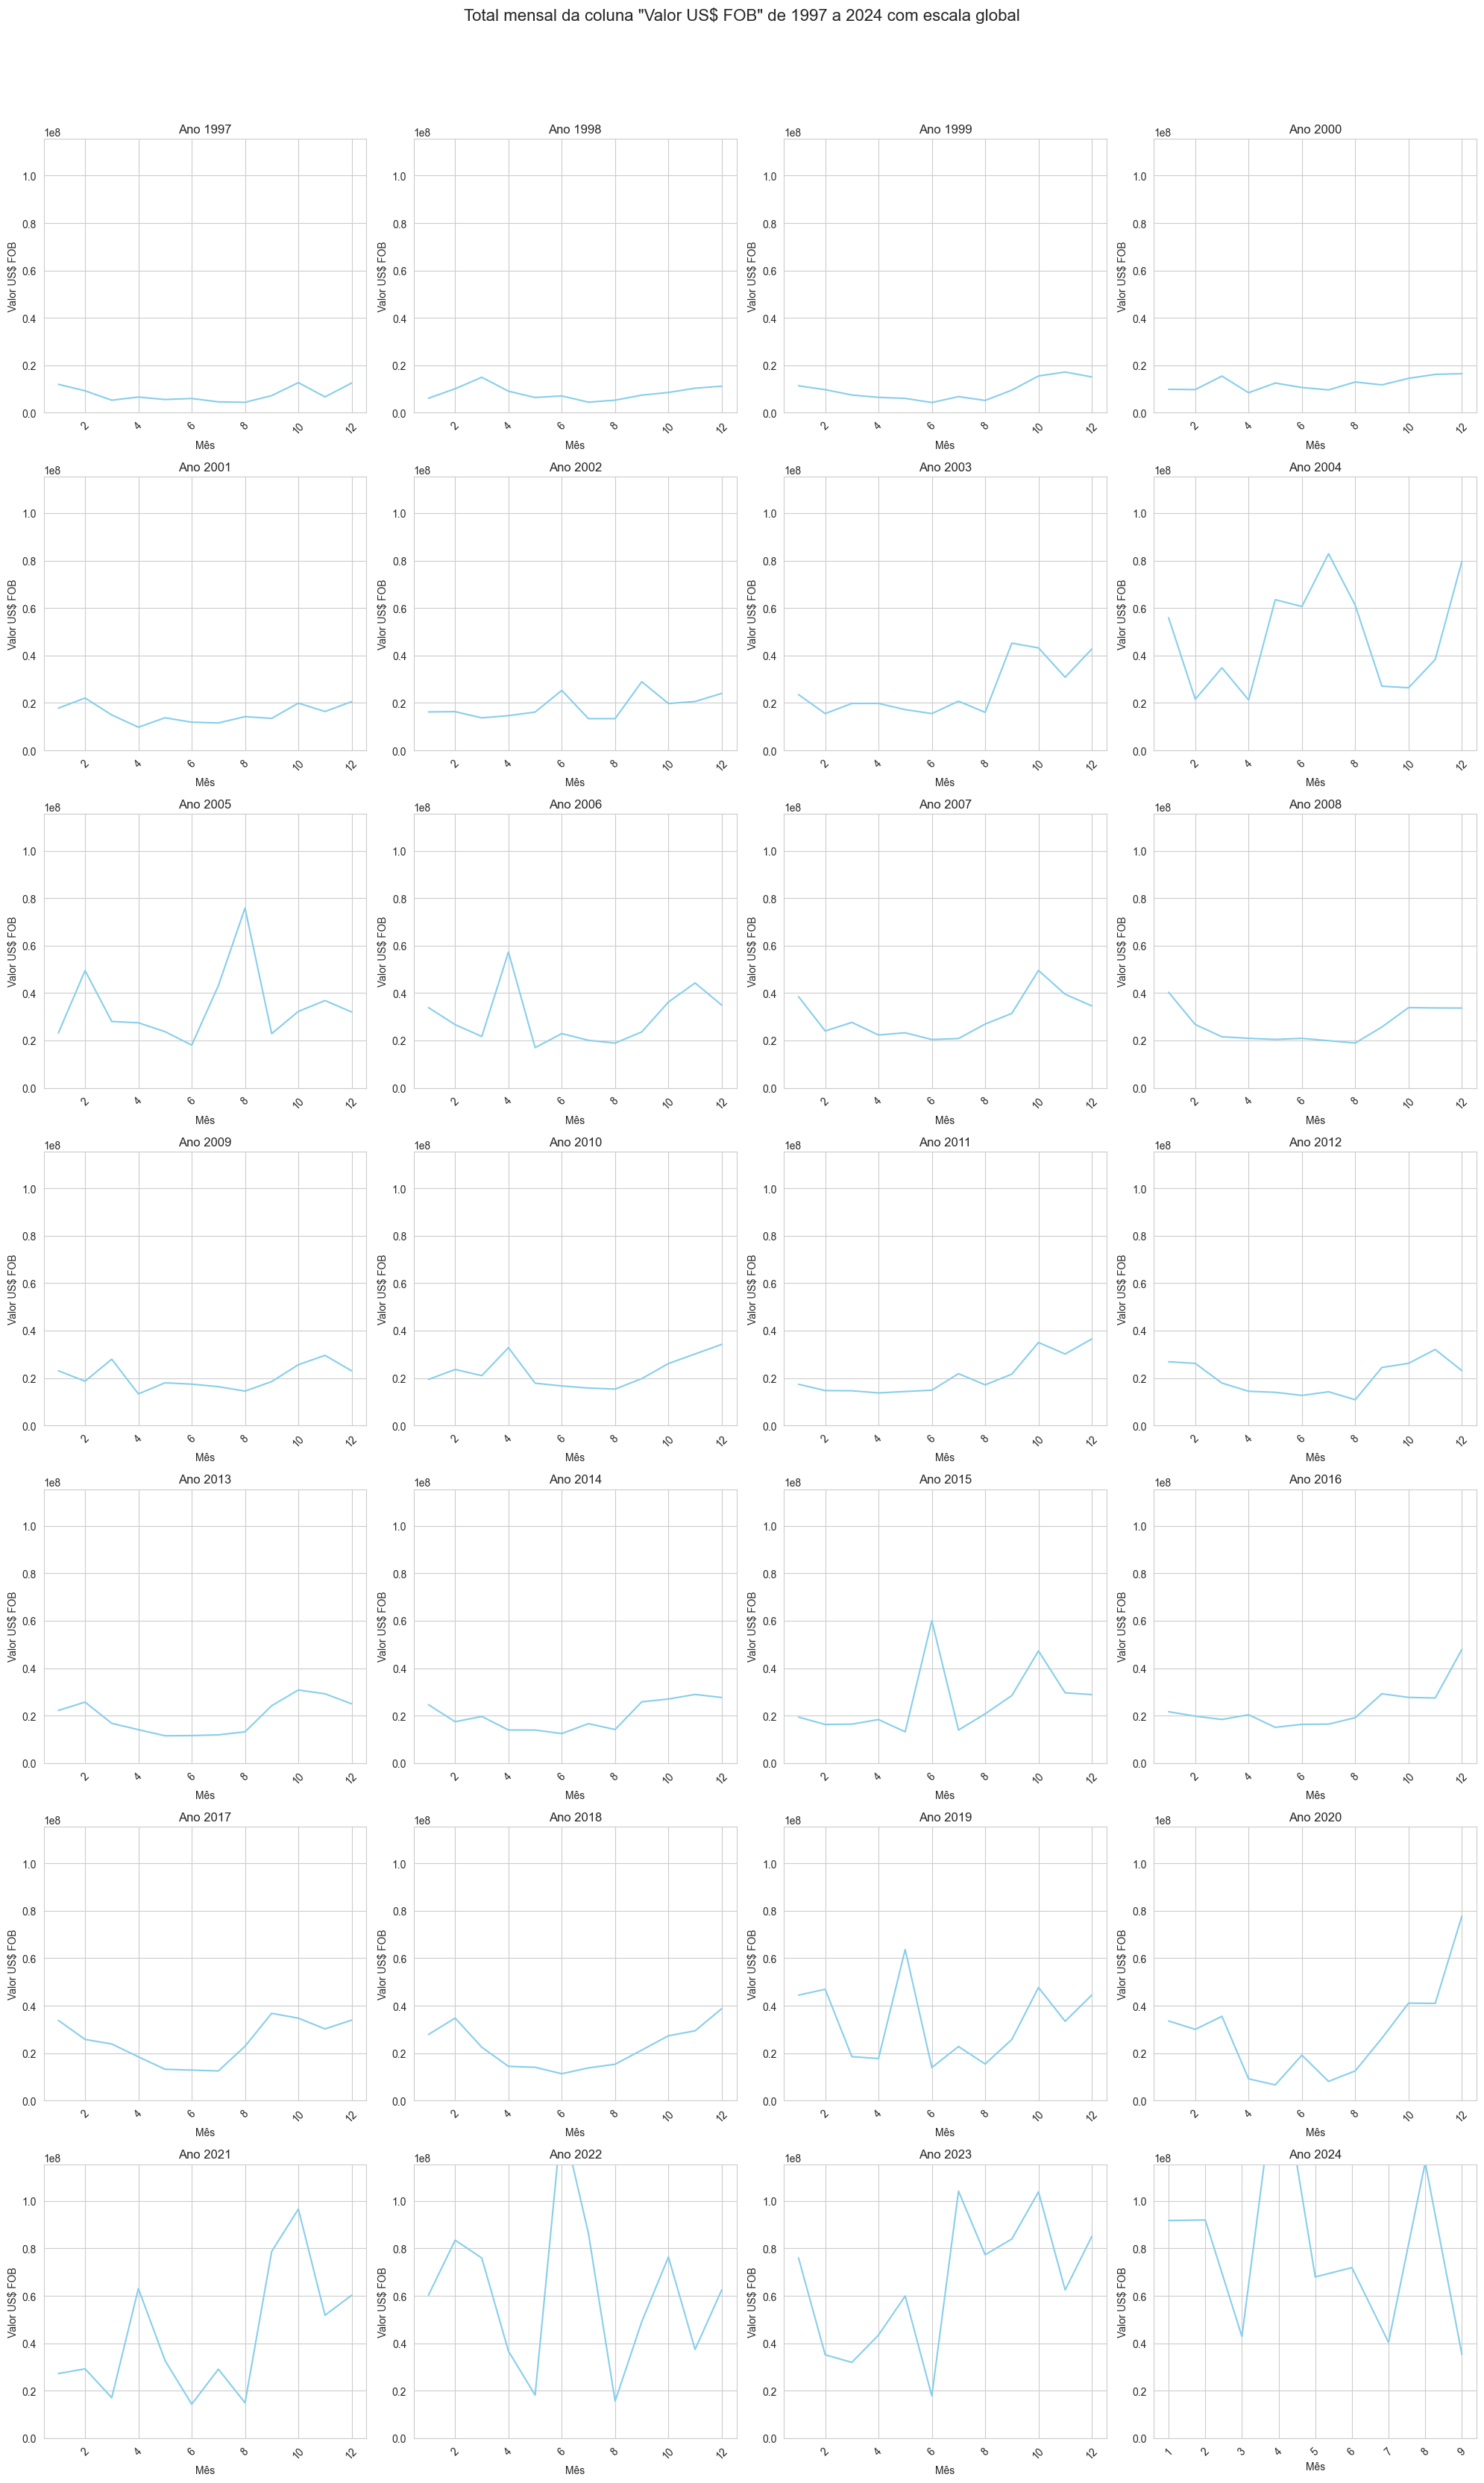

In [21]:
plot_annual_charts_with_global_scale(dfs_por_ano_continentes, column='Valor US$ FOB')

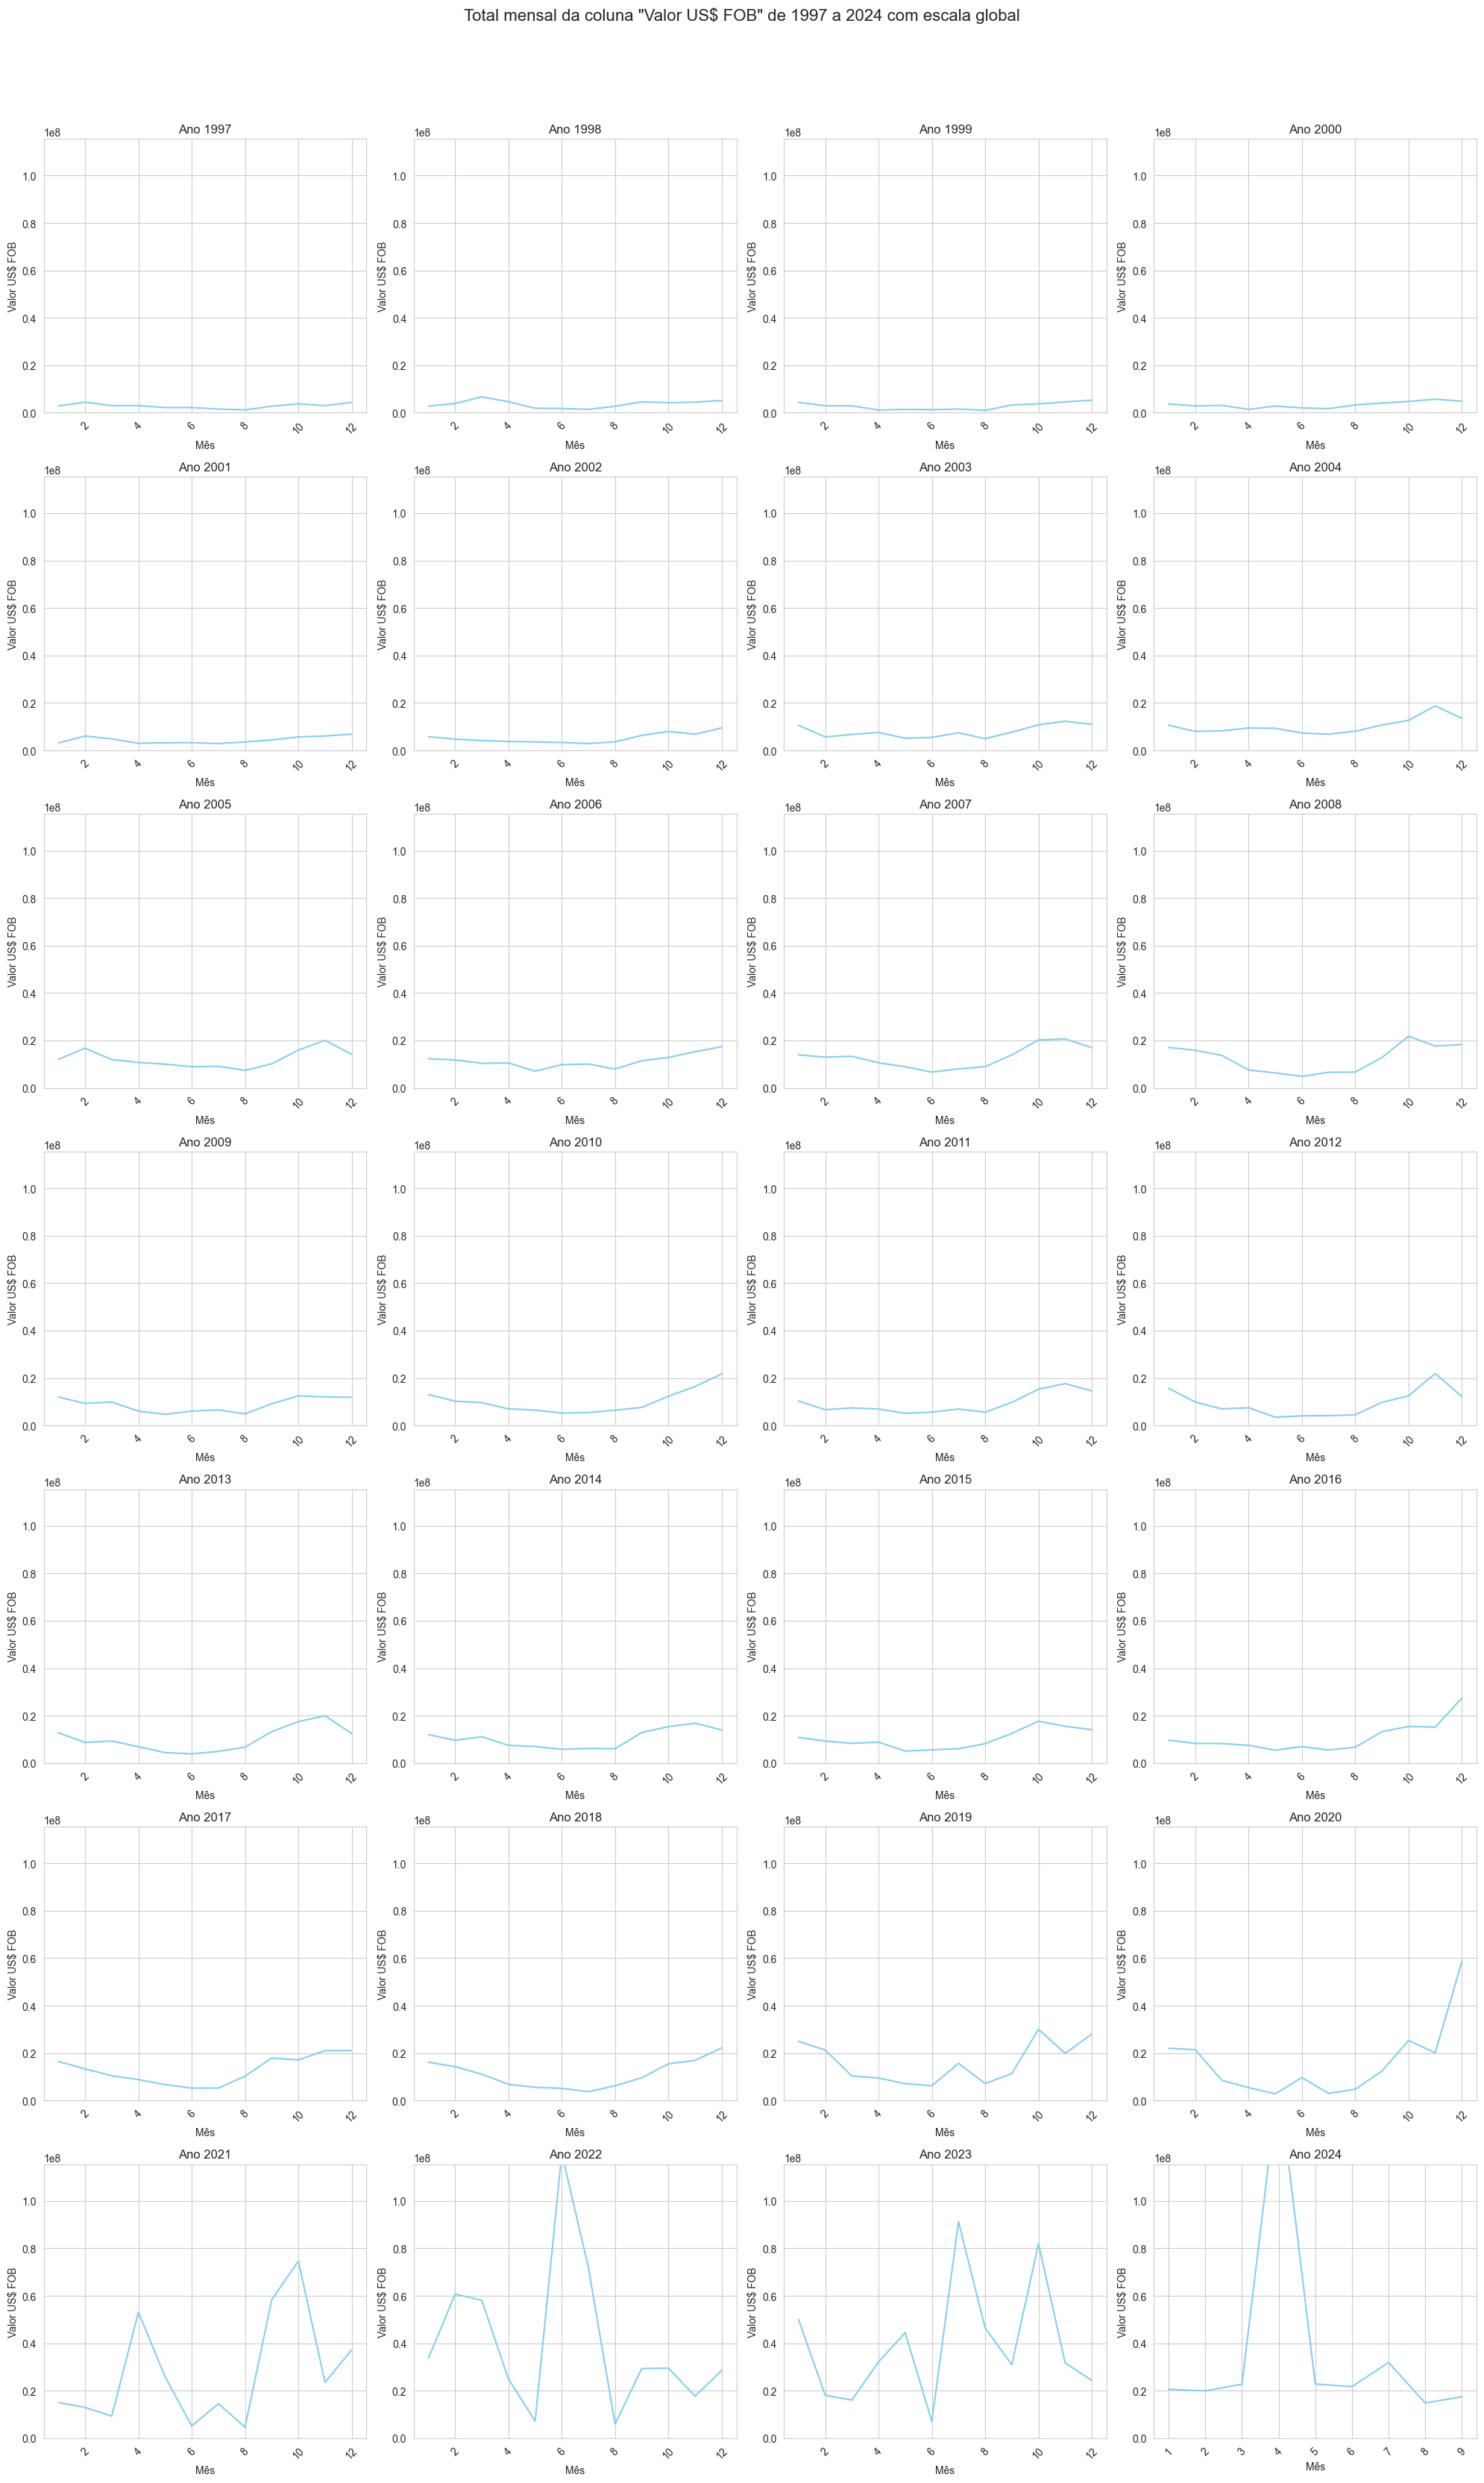

In [22]:
plot_annual_charts_with_global_scale(dfs_por_ano_blocos_economicos, column='Valor US$ FOB')

In [23]:
import pandas as pd
import seaborn as sns

def plot_exports_for_years(dataframes_dict, years, chart_title, column='Valor US$ FOB'):
    """
    Plota um gráfico de linha unificado para vários anos, onde cada linha representa as exportações de um ano específico.

    Parâmetros:
    - dataframes_dict: dicionário com DataFrames, onde as chaves são os anos.
    - years: lista de anos a serem plotados.
    - column: coluna a ser utilizada para calcular os totais mensais.
    """
    consolidated_data = []

    for year in years:
        if year in dataframes_dict:
            df_year = dataframes_dict[year]
            monthly_totals = df_year.groupby('Mês')[column].sum().reset_index()
            monthly_totals['Ano'] = year  # Adiciona coluna do ano
            consolidated_data.append(monthly_totals)

    if not consolidated_data:
        print("Nenhum dado encontrado para os anos especificados.")
        return

    # Converte a lista de DataFrames em um único DataFrame
    final_df = pd.concat(consolidated_data)

    # Configura o estilo do Seaborn e define uma paleta de cores
    sns.set(style="whitegrid")

    # Plota o gráfico de linha unificado usando apenas Seaborn
    sns.lineplot(data=final_df, x='Mês', y=column, hue='Ano', palette="bright")

    # Configura o título e os rótulos dos eixos diretamente no Seaborn
    plt.title(chart_title, fontsize=16)
    plt.xlabel('Mês')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.legend(title='Ano')

    # Exibe o gráfico
    plt.show()

# Exemplo de uso:
# plot_exports_for_years(dfs_por_ano, years=[2020, 2021, 2022], column='Valor US$ FOB')


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_exports_in_grid(dataframes_dict, years_list, chart_titles, column='Valor US$ FOB'):
    """
    Plota múltiplos gráficos em um grid.

    Parâmetros:
    - dataframes_dict: dicionário com DataFrames, onde as chaves são os anos.
    - years_list: lista de listas de anos a serem plotados.
    - chart_titles: lista de títulos para cada gráfico.
    - column: coluna a ser utilizada para calcular os totais mensais.
    """
    num_plots = len(years_list)
    num_cols = 2  # Número de colunas no grid
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calcular o número de linhas necessárias

    # Cria uma figura com subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), squeeze=False)

    # Plota cada conjunto de anos em um subplot
    for i, (years, title) in enumerate(zip(years_list, chart_titles)):
        ax = axes[i // num_cols, i % num_cols]  # Acessa o subplot apropriado

        consolidated_data = []

        for year in years:
            if year in dataframes_dict:
                df_year = dataframes_dict[year]
                monthly_totals = df_year.groupby('Mês')[column].sum().reset_index()
                monthly_totals['Ano'] = year  # Adiciona coluna do ano
                consolidated_data.append(monthly_totals)

        if consolidated_data:
            # Converte a lista de DataFrames em um único DataFrame
            final_df = pd.concat(consolidated_data)

            # Plota os dados no eixo atual
            sns.lineplot(data=final_df, x='Mês', y=column, hue='Ano', palette="dark", ax=ax)

        # Configura o título e os rótulos dos eixos
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('Mês')
        ax.set_ylabel(column)
        ax.tick_params(axis='x', rotation=45)

    # Remove qualquer subplot vazio
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o layout
    plt.show()


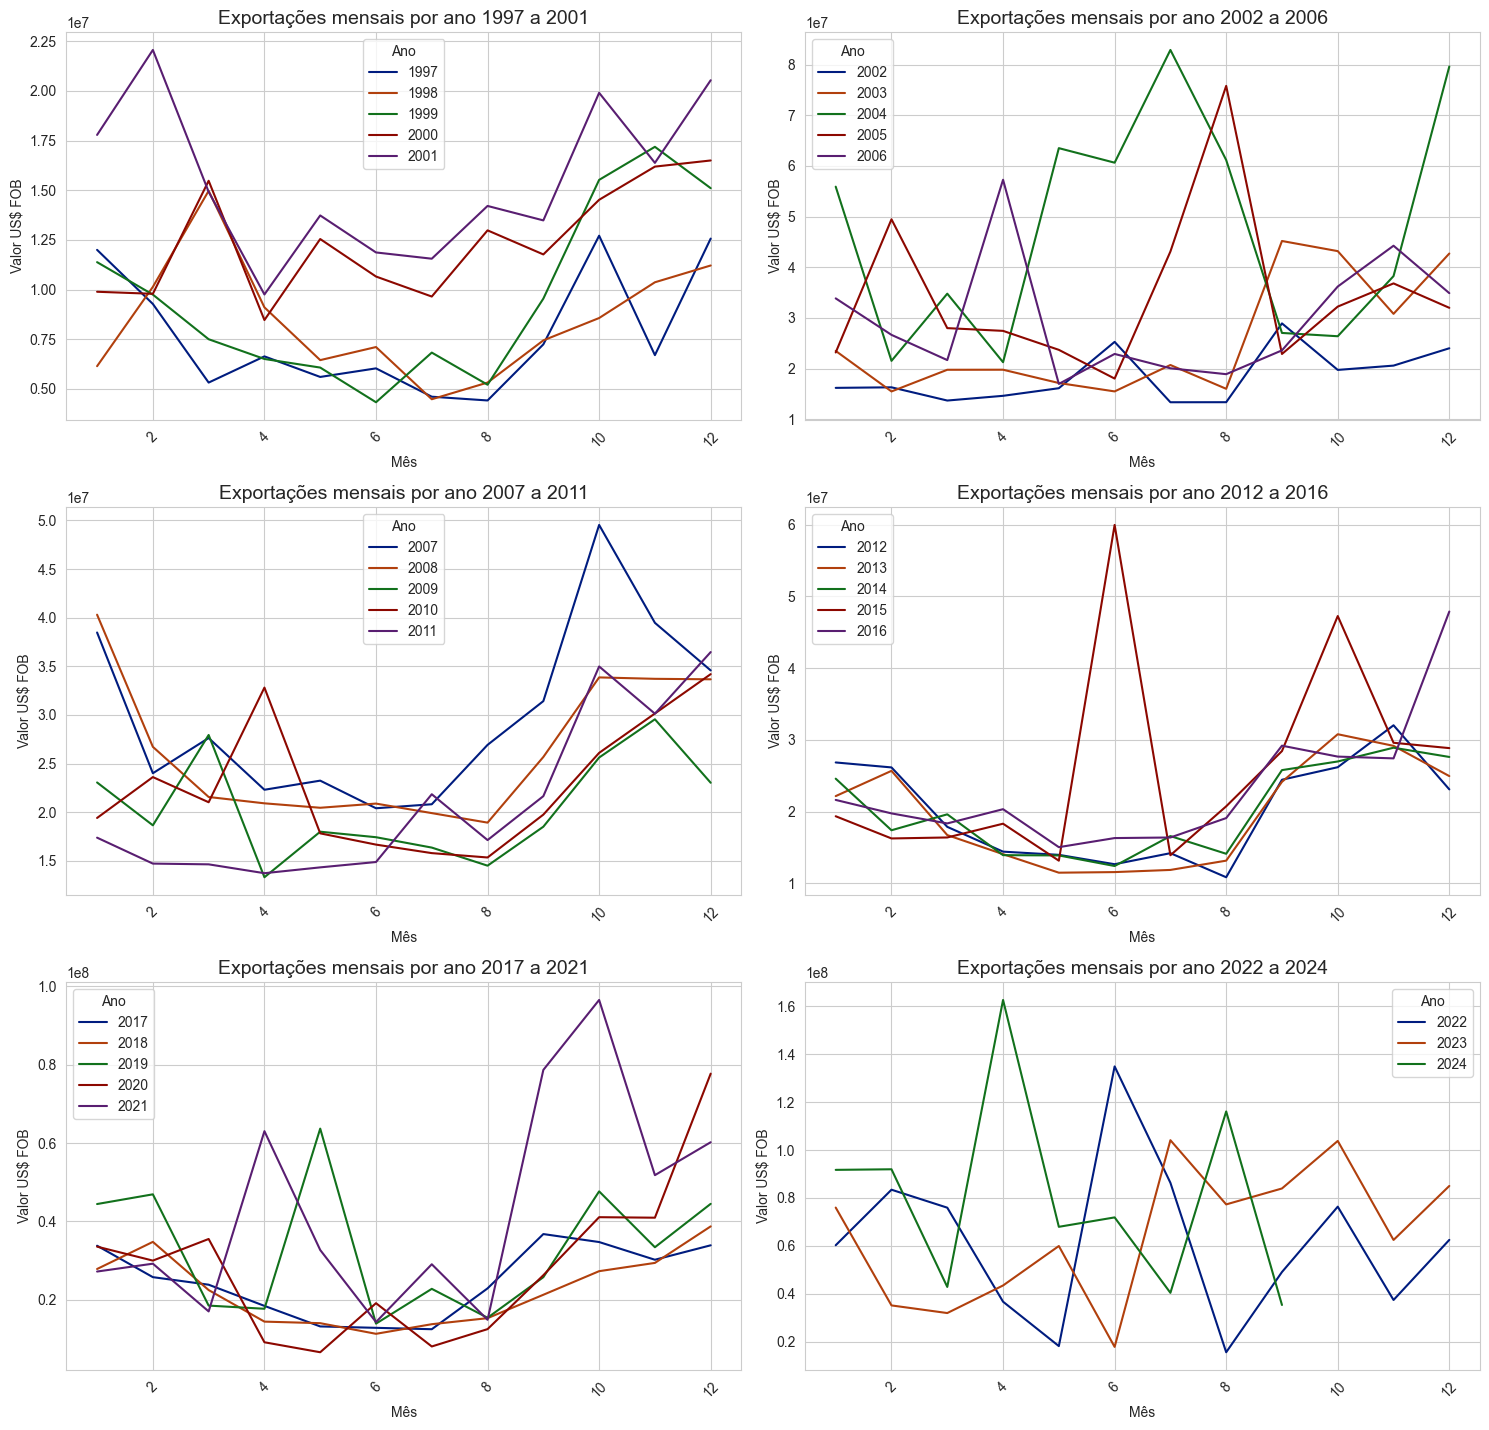

In [25]:
# Lista de anos organizados de 5 em 5
years_list = [
    [1997, 1998, 1999, 2000, 2001],
    [2002, 2003, 2004, 2005, 2006],
    [2007, 2008, 2009, 2010, 2011],
    [2012, 2013, 2014, 2015, 2016],
    [2017, 2018, 2019, 2020, 2021],
    [2022, 2023, 2024]
]

chart_titles = [
    "Exportações mensais por ano 1997 a 2001",
    "Exportações mensais por ano 2002 a 2006",
    "Exportações mensais por ano 2007 a 2011",
    "Exportações mensais por ano 2012 a 2016",
    "Exportações mensais por ano 2017 a 2021",
    "Exportações mensais por ano 2022 a 2024"
]

# Chama a função para plotar os gráficos
plot_exports_in_grid(dfs_por_ano_continentes, years_list, chart_titles, column='Valor US$ FOB')


---

# Listagens por ano

---

In [38]:
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go

def plota_tabela_listagens(dicionario_listas, grid_title):

    # Criando uma figura de subplots
    n = len(dicionario_listas)
    cols = 2  # Número de colunas
    rows = (n + cols - 1) // cols  # Número de linhas necessárias

    # Aumentando a altura e a largura
    fig = sp.make_subplots(rows=rows, cols=cols, specs=[[{'type': 'table'}]*cols]*rows)

    for i, (ano, df) in enumerate(dicionario_listas.items()):
        row = i // cols + 1
        col = i % cols + 1
        table = go.Table(
            header=dict(
                values=[f"{ano}<br>{col_name}" for col_name in df.columns],  # Incluindo o ano no cabeçalho
                fill_color='paleturquoise',
                height=40  # Aumentando a altura do cabeçalho
            ),
            cells=dict(
                values=df.values.T,
                fill_color='lavender',
                height=30,  # Aumentando a altura das células
                # Adicionando rótulos acima de cada célula
                # O valor deve ter o mesmo formato da estrutura de valores
                #text=[[f"Label {j+1}" for j in range(df.shape[0])] for _ in range(df.shape[1])],
                align='center'  # Alinhando o texto ao centro
            )
        )
        fig.add_trace(table, row=row, col=col)

    # Ajuste as margens para evitar sobreposição
    fig.update_layout(
        height=500 + (rows * 200),  # Aumentando a altura total
        width=600,  # Aumentando a largura total
        title_text=grid_title,
        margin=dict(l=20, r=20, t=50, b=20)  # Ajustando margens
    )

    fig.show()


## Listagem de produtos mais relevantes por Valor US$ FOB

In [36]:
listas_valor_fob = {}

for ano, df_ano in dfs_por_ano_continentes.items():  # Usando .items() para acessar ano e DataFrame

    # Agrupar por 'Código SH6' e 'Descrição SH6' e somar o 'Valor US$ FOB'
    produtos_relevantes_fob_ano = df_ano.groupby(['Código SH6', 'Descrição SH6'], as_index=False)['Valor US$ FOB'].sum()

    # Ordenar pelos valores FOB em ordem decrescente e selecionar os 25 produtos com maior valor FOB
    produtos_relevantes_fob_ano = produtos_relevantes_fob_ano.sort_values(by='Valor US$ FOB', ascending=False).head(25)

    # Armazenar o DataFrame diretamente no dicionário
    listas_valor_fob[ano] = produtos_relevantes_fob_ano  # Armazena o DataFrame diretamente

In [39]:
plota_tabela_listagens(listas_valor_fob, grid_title= "Grid de listagens por Valor US$ FOB por ano")

## Listagem de produtos mais relevantes por Quilograma Líquido por ano

In [40]:
listas_quilograma_liquido = {}

for ano, df_ano in dfs_por_ano_continentes.items():  # Usando .items() para acessar ano e DataFrame

    # Agrupar por 'Código SH6' e 'Descrição SH6' e somar o 'Valor US$ FOB'
    produtos_relevantes_quilos_ano = df_ano.groupby(['Código SH6', 'Descrição SH6'], as_index=False)['Quilograma Líquido'].sum()

    # Ordenar pelos valores FOB em ordem decrescente e selecionar os 25 produtos com maior valor FOB
    produtos_relevantes_quilos_ano = produtos_relevantes_quilos_ano.sort_values(by='Quilograma Líquido', ascending=False).head(25)

    # Armazenar o DataFrame diretamente no dicionário
    listas_quilograma_liquido[ano] = produtos_relevantes_quilos_ano  # Armazena o DataFrame diretamente

In [41]:
plota_tabela_listagens(listas_quilograma_liquido, grid_title="Grid de listagens por Quilograma Líquido por ano")

## Listagem dos produtos por quantidade de transações

In [42]:
listas_quantidade_transacoes = {}

for ano, df_ano in dfs_por_ano_continentes.items():  # Usando .items() para acessar ano e DataFrame

    dataset_quantidade_transacoes_ano = df_ano.groupby('Código SH6').agg(
        **{"Descrição SH6": ('Descrição SH6', 'first'),        # Pega a primeira ocorrência da descrição
           "Quantidade Transações": ('Código SH6', 'size'),    # Conta a quantidade de transações
           "Soma Valor FOB": ('Valor US$ FOB', 'sum')}         # Calcula a soma do valor US$ FOB
    ).reset_index()

    dataset_quantidade_transacoes_ano = dataset_quantidade_transacoes_ano.sort_values(by='Quantidade Transações', ascending=False).head(25)

    #dataset_quantidade_transacoes_ano["valor_medio_transacao"] = dataset_quantidade_transacoes_ano["Soma_Valor_FOB"] / dataset_quantidade_transacoes_ano["Quantidade_Transacoes"]

    listas_quantidade_transacoes[ano] = dataset_quantidade_transacoes_ano

In [43]:
plota_tabela_listagens(listas_quantidade_transacoes, grid_title = "Grid de listagens por Quantidade de Transações por ano")

## Listagem de produto por valor médio da transação

In [47]:
listas_valor_medio_transacao = {}

for ano, df_ano in dfs_por_ano_continentes.items():  # Usando .items() para acessar ano e DataFrame

    dataset_quantidade_transacoes_ano = df_ano.groupby('Código SH6').agg(
        **{"Descrição SH6": ('Descrição SH6', 'first'),        # Pega a primeira ocorrência da descrição
           "Quantidade Transações": ('Código SH6', 'size'),    # Conta a quantidade de transações
           "Soma Valor FOB": ('Valor US$ FOB', 'sum')}         # Calcula a soma do valor US$ FOB
    ).reset_index()

    dataset_quantidade_transacoes_ano["valor_medio_transacao"] = dataset_quantidade_transacoes_ano["Soma Valor FOB"] / dataset_quantidade_transacoes_ano["Quantidade Transações"]

    dataset_quantidade_transacoes_ano = dataset_quantidade_transacoes_ano.sort_values(by='valor_medio_transacao', ascending=False).head(25)

    listas_valor_medio_transacao[ano] = dataset_quantidade_transacoes_ano


In [48]:
plota_tabela_listagens(listas_valor_medio_transacao, grid_title = "Grid de listagens por Valor médio da transação por ano")

---

# Listagens apenas com código e descrição para comparação

---

## Lista por Valor US$ FOB apenas com código e descrição SH6

In [49]:
# Novo dicionário para armazenar os DataFrames processados
listas_valor_fob_sh6 = {}

# Iterando sobre os 27 DataFrames em listas_valor_fob
for ano, produtos_relevantes_fob in listas_valor_fob.items():
    # Criando uma cópia do DataFrame sem a coluna 'Valor US$ FOB'
    produtos_relevantes_fob_sh6 = produtos_relevantes_fob.drop('Valor US$ FOB', axis=1)

    # Resetando os índices para que comecem a partir de 1
    produtos_relevantes_fob_sh6.reset_index(drop=True, inplace=True)
    produtos_relevantes_fob_sh6.index = range(1, len(produtos_relevantes_fob_sh6) + 1)
    
    # Armazenando o DataFrame processado no novo dicionário
    listas_valor_fob_sh6[ano] = produtos_relevantes_fob_sh6

# O novo dicionário listas_valor_fob_sh6 contém os 27 DataFrames modificados


## Lista por Quilograma Líquido apenas com código e descrição SH6

In [50]:
# Novo dicionário para armazenar os DataFrames processados
listas_quilograma_liquido_sh6 = {}

# Iterando sobre os 27 DataFrames em listas_quilograma_liquido
for ano, produtos_relevantes_fob in listas_quilograma_liquido.items():
    # Criando uma cópia do DataFrame sem a coluna 'Valor US$ FOB'
    produtos_relevantes_quilograma_liquido_sh6 = produtos_relevantes_fob.drop('Quilograma Líquido', axis=1)

    # Resetando os índices para que comecem a partir de 1
    produtos_relevantes_quilograma_liquido_sh6.reset_index(drop=True, inplace=True)
    produtos_relevantes_quilograma_liquido_sh6.index = range(1, len(produtos_relevantes_quilograma_liquido_sh6) + 1)

    # Armazenando o DataFrame processado no novo dicionário
    listas_quilograma_liquido_sh6[ano] = produtos_relevantes_quilograma_liquido_sh6

# O novo dicionário listas_valor_fob_sh6 contém os 27 DataFrames modificados
listas_quilograma_liquido_sh6[2020]

,Código SH6,Descrição SH6
1,250100,Sal (incluídos o sal de mesa e o sal desnatura...
2,271019,Outros óleos de petróleo ou de minerais betumi...
3,80719,Melões frescos
4,80711,Melancias frescas
5,80720,Mamões (papaias) frescos
6,720410,Desperdícios e resíduos de ferro fundido
7,80450,"Goiabas, mangas e mangostões, frescos ou secos"
8,680293,Granitos trabalhados de outro modo e suas obras
9,260200,"Minérios de manganês e seus concentrados, incl..."
10,170199,"Outros açúcares de cana, de beterraba e sacaro..."


## Lista por valor médio da transação apenas com código e descrição SH6

In [51]:
listas_valor_medio_transacao[2020]

,Código SH6,Descrição SH6,Quantidade Transações,Soma Valor FOB,valor_medio_transacao
33,271019,Outros óleos de petróleo ou de minerais betumi...,36,62178944,1.727193e+06
9,170199,"Outros açúcares de cana, de beterraba e sacaro...",2,2084241,1.042120e+06
158,80719,Melões frescos,157,95298176,6.069948e+05
80,51199,"Outros produtos de origem animal, impróprios p...",27,14485155,5.364872e+05
126,710310,"Pedras preciosas ou semipreciosas, em bruto ou...",11,4848312,4.407556e+05
24,250100,Sal (incluídos o sal de mesa e o sal desnatura...,74,29011396,3.920459e+05
8,170114,Outros açúcares de cana,3,1154182,3.847273e+05
162,81340,Pêras e outras frutas secas,6,1767481,2.945802e+05
32,261100,Minérios de tungstênio e seus concentrados,12,3302041,2.751701e+05
45,30391,"Fígados, ovas e gônadas masculinas, congelado",11,2970627,2.700570e+05


In [53]:
# Novo dicionário para armazenar os DataFrames processados
listas_valor_medio_transacao_sh6 = {}

# Iterando sobre os 27 DataFrames em listas_quilograma_liquido
for ano, produtos_relevantes_fob in listas_valor_medio_transacao.items():
    
    # Criando uma cópia do DataFrame sem a coluna 'Valor US$ FOB'
    produtos_relevantes_valor_medio_transacao_sh6 = produtos_relevantes_fob.drop('Quantidade Transações', axis=1)
    produtos_relevantes_valor_medio_transacao_sh6 = produtos_relevantes_valor_medio_transacao_sh6.drop('Soma Valor FOB', axis=1)
    produtos_relevantes_valor_medio_transacao_sh6 = produtos_relevantes_valor_medio_transacao_sh6.drop('valor_medio_transacao', axis=1)

    # Resetando os índices para que comecem a partir de 1
    produtos_relevantes_valor_medio_transacao_sh6.reset_index(drop=True, inplace=True)
    produtos_relevantes_valor_medio_transacao_sh6.index = range(1, len(produtos_relevantes_valor_medio_transacao_sh6) + 1)
    
    # Armazenando o DataFrame processado no novo dicionário
    listas_valor_medio_transacao_sh6[ano] = produtos_relevantes_valor_medio_transacao_sh6

# O novo dicionário listas_valor_fob_sh6 contém os 27 DataFrames modificados
listas_valor_medio_transacao_sh6[2020]

,Código SH6,Descrição SH6
1,271019,Outros óleos de petróleo ou de minerais betumi...
2,170199,"Outros açúcares de cana, de beterraba e sacaro..."
3,80719,Melões frescos
4,51199,"Outros produtos de origem animal, impróprios p..."
5,710310,"Pedras preciosas ou semipreciosas, em bruto ou..."
6,250100,Sal (incluídos o sal de mesa e o sal desnatura...
7,170114,Outros açúcares de cana
8,81340,Pêras e outras frutas secas
9,261100,Minérios de tungstênio e seus concentrados
10,30391,"Fígados, ovas e gônadas masculinas, congelado"


## Lista por quantidade total de transações apenas com código e descrição SH6

In [54]:
listas_quantidade_transacoes[2020]

,Código SH6,Descrição SH6,Quantidade Transações,Soma Valor FOB
159,80720,Mamões (papaias) frescos,364,8955587
158,80719,Melões frescos,157,95298176
157,80711,Melancias frescas,127,32577048
92,520932,"Tecido de algodão tinto, em ponto sarjado, con...",94,3326714
90,520922,"Tecido de algodão branqueado, em ponto sarjado...",84,5599867
24,250100,Sal (incluídos o sal de mesa e o sal desnatura...,74,29011396
11,170490,"Outros produtos de confeitaria, sem cacau",73,4239923
151,80132,"Castanha de caju, fresca ou seca, sem casca",67,6101023
120,680293,Granitos trabalhados de outro modo e suas obras,54,6603818
91,520929,"Outros tecidos de algodão branqueado, contendo...",51,2974229


In [78]:
# Novo dicionário para armazenar os DataFrames processados
listas_quantidade_transacoes_sh6 = {}

# Iterando sobre os 27 DataFrames em listas_quilograma_liquido
for ano, produtos_relevantes_fob in listas_quantidade_transacoes.items():
    # Criando uma cópia do DataFrame sem a coluna 'Valor US$ FOB'
    produtos_relevantes_quantidade_transacao_sh6 = produtos_relevantes_fob.drop('Quantidade Transações', axis=1)
    produtos_relevantes_quantidade_transacao_sh6 = produtos_relevantes_quantidade_transacao_sh6.drop('Soma Valor FOB', axis=1)

    # Resetando os índices para que comecem a partir de 1
    produtos_relevantes_quantidade_transacao_sh6.reset_index(drop=True, inplace=True)
    produtos_relevantes_quantidade_transacao_sh6.index = range(1, len(produtos_relevantes_quantidade_transacao_sh6) + 1)

    # Armazenando o DataFrame processado no novo dicionário
    listas_quantidade_transacoes_sh6[ano] = produtos_relevantes_quantidade_transacao_sh6

# O novo dicionário listas_valor_fob_sh6 contém os 27 DataFrames modificados
listas_quantidade_transacoes_sh6[1997]


,Código SH6,Descrição SH6
1,170490,"Outros produtos de confeitaria, sem cacau"
2,170410,"Gomas de mascar, sem cacau, mesmo revestidas d..."
3,80719,Melões frescos
4,410429,"Outros couros e peles, de bovinos/equídeos, cu..."
5,80132,"Castanha de caju, fresca ou seca, sem casca"
6,200980,Sucos de outras frutas ou de produtos hortícol...
7,80300,Bananas frescas ou secas
8,520932,"Tecido de algodão tinto, em ponto sarjado, con..."
9,30269,"Outros peixes frescos ou refrigerados, exceto ..."
10,960621,"Botões de plásticos, não recobertos de matéria..."


---

# Cálculo da relevância por ano dos produtos 

---

In [81]:
import pandas as pd

# Definindo a lista de DataFrames fornecidos
listas_dataframes = [
    listas_valor_fob_sh6,
    listas_quilograma_liquido_sh6,
    listas_valor_medio_transacao_sh6,
    listas_quantidade_transacoes_sh6
]

# DataFrame final com as colunas especificadas
df_indices_anos = pd.DataFrame(columns=[
    "Ano", "Código SH6", "Descrição SH6",
    "Peso na lista 1", "Peso na lista 2",
    "Peso na lista 3", "Peso na lista 4"
])

def peso_produto_lista(indice_produto):
    return 26 - indice_produto

# Itera sobre as listas de DataFrames
for i, listas_anos in enumerate(listas_dataframes):
    # Itera sobre cada ano dentro da lista específica
    for ano, df_ano in listas_anos.items():
        for idx, produto in df_ano.iterrows():
            codigo = produto['Código SH6']
            descricao = produto['Descrição SH6']
            peso = peso_produto_lista(idx)

            # Verifica se o código já existe para o ano atual
            if not ((df_indices_anos['Ano'] == ano) & (df_indices_anos['Código SH6'] == codigo)).any():
                # Adiciona nova linha se o código ainda não estiver no DataFrame para o ano atual
                new_row = {
                    "Ano": ano,
                    "Código SH6": codigo,
                    "Descrição SH6": descricao,
                    "Peso na lista 1": 0,
                    "Peso na lista 2": 0,
                    "Peso na lista 3": 0,
                    "Peso na lista 4": 0
                }
                df_indices_anos = pd.concat([df_indices_anos, pd.DataFrame([new_row])], ignore_index=True)

            # Atualiza o peso no DataFrame
            pos_col = f"Peso na lista {i + 1}"
            df_indices_anos.loc[(df_indices_anos['Ano'] == ano) & (df_indices_anos['Código SH6'] == codigo), pos_col] = peso

# Mostra o DataFrame resultante
df_indices_anos

,Ano,Código SH6,Descrição SH6,Peso na lista 1,Peso na lista 2,Peso na lista 3,Peso na lista 4
0,2024,271019,Outros óleos de petróleo ou de minerais betumi...,25,25,19,19
1,2024,80719,Melões frescos,24,23,23,23
2,2024,271012,Óleos leves e preparações,23,22,0,0
3,2024,80711,Melancias frescas,22,21,20,20
4,2024,250100,Sal (incluídos o sal de mesa e o sal desnatura...,21,24,15,15
...,...,...,...,...,...,...,...
1030,1998,960629,Outros botões,0,0,9,9
1031,1998,960622,"Botões de metais comuns, não recobertos de mat...",0,0,3,3
1032,1997,960629,Outros botões,0,0,7,7
1033,1997,960622,"Botões de metais comuns, não recobertos de mat...",0,0,6,6


# # Adicionando coluna de relevancia para cada produto em cada ano

In [74]:
# Pesos das listas
peso_lista_1 = 1
peso_lista_2 = 1
peso_lista_3 = 1
peso_lista_4 = 1
lista_pesos = [peso_lista_1, peso_lista_2, peso_lista_3, peso_lista_4]


def calculo_metrica_relevancia(lista_posicoes):
    df_relevancias = pd.DataFrame({
        "Código SH6": [],
        "Descrição SH6": [],
        "Peso na lista 1": [],
        "Peso na lista 2": [],
        "Peso na lista 3": [],
        "Peso na lista 4": [],
        "Relevância": [],
    })

    for i, produto in lista_posicoes.iterrows():
        relevancia_produto = 0
        for indice, peso in enumerate(lista_pesos):
            peso_produto_lista = produto[f"Peso na lista {indice+1}"]
            relevancia_produto += peso_produto_lista * peso

        # Adicionando os dados do produto ao DataFrame
        nova_linha = pd.DataFrame({
            "Código SH6": [produto["Código SH6"]],
            "Descrição SH6": [produto["Descrição SH6"]],
            "Peso na lista 1": [produto["Peso na lista 1"]],
            "Peso na lista 2": [produto["Peso na lista 2"]],
            "Peso na lista 3": [produto["Peso na lista 3"]],
            "Peso na lista 4": [produto["Peso na lista 4"]],
            "Relevância": [relevancia_produto]
        })
        # Usando pd.concat para adicionar a nova linha
        df_relevancias = pd.concat([df_relevancias, nova_linha], ignore_index=True)

    return df_relevancias

In [106]:
# Dicionário para armazenar os DataFrames de relevâncias por ano
relevancias_por_ano = {}

# Itera sobre cada ano no DataFrame `df_indices_anos`
for ano in df_indices_anos['Ano'].unique():
    # Filtra o DataFrame para o ano atual
    df_ano = df_indices_anos[df_indices_anos['Ano'] == ano]

    # Calcula as relevâncias para o ano atual usando a função `calculo_metrica_relevancia`
    df_relevancia_ano = calculo_metrica_relevancia(df_ano)

    # Ordena o DataFrame pela coluna 'Relevância' em ordem decrescente e seleciona os 25 primeiros
    df_relevancia_ano = df_relevancia_ano.sort_values(by="Relevância", ascending=False).head(25).reset_index(drop=True)

    # Armazena o DataFrame ordenado no dicionário, usando o ano como chave
    relevancias_por_ano[ano] = df_relevancia_ano
    
relevancias_por_ano[2002]

,Código SH6,Descrição SH6,Peso na lista 1,Peso na lista 2,Peso na lista 3,Peso na lista 4,Relevância
0,30613,Camarões congelados,25.0,20.0,24.0,24.0,93.0
1,80719,Melões frescos,24.0,22.0,22.0,22.0,90.0
2,170490,"Outros produtos de confeitaria, sem cacau",15.0,17.0,25.0,25.0,82.0
3,80132,"Castanha de caju, fresca ou seca, sem casca",22.0,19.0,20.0,20.0,81.0
4,80300,Bananas frescas ou secas,20.0,21.0,17.0,17.0,75.0
5,170410,"Gomas de mascar, sem cacau, mesmo revestidas d...",11.0,14.0,23.0,23.0,71.0
6,610910,"Camisetas (T-shirts) e camisetas interiores, d...",21.0,13.0,18.0,18.0,70.0
7,250100,Sal (incluídos o sal de mesa e o sal desnatura...,18.0,25.0,12.0,12.0,67.0
8,80720,Mamões (papaias) frescos,9.0,10.0,21.0,21.0,61.0
9,30269,"Outros peixes frescos ou refrigerados, exceto ...",17.0,11.0,16.0,16.0,60.0


In [108]:
# Criando um único DataFrame para armazenar todas as relevâncias de todos os anos
df_relevancia_total = pd.DataFrame()

# Itera sobre cada ano e DataFrame de relevância no dicionário `relevancias_por_ano`
for ano, df_relevancia_ano in relevancias_por_ano.items():
    # Adiciona a coluna "Ano" ao DataFrame atual como primeira coluna
    #df_relevancia_ano.insert(0, 'Ano', ano)

    # Concatena o DataFrame atual ao DataFrame total
    df_relevancia_total = pd.concat([df_relevancia_total, df_relevancia_ano], ignore_index=True)

# Exibe o DataFrame total com todas as relevâncias unidas
df_relevancia_total


,Ano,Código SH6,Descrição SH6,Peso na lista 1,Peso na lista 2,Peso na lista 3,Peso na lista 4,Relevância
0,2024,80719,Melões frescos,24.0,23.0,23.0,23.0,93.0
1,2024,271019,Outros óleos de petróleo ou de minerais betumi...,25.0,25.0,19.0,19.0,88.0
2,2024,80720,Mamões (papaias) frescos,20.0,17.0,25.0,25.0,87.0
3,2024,80711,Melancias frescas,22.0,21.0,20.0,20.0,83.0
4,2024,520922,"Tecido de algodão branqueado, em ponto sarjado...",19.0,10.0,24.0,24.0,77.0
...,...,...,...,...,...,...,...,...
695,1997,51199,"Outros produtos de origem animal, impróprios p...",0.0,11.0,5.0,5.0,21.0
696,1997,180690,Outros chocolates e preparações alimentícias c...,0.0,2.0,9.0,9.0,20.0
697,1997,520922,"Tecido de algodão branqueado, em ponto sarjado...",9.0,1.0,4.0,4.0,18.0
698,1997,80711,Melancias frescas,0.0,8.0,3.0,3.0,14.0


In [112]:
# Criando um único DataFrame para armazenar todas as relevâncias de todos os anos
df_relevancia_total = pd.DataFrame()

# Itera sobre cada ano e DataFrame de relevância no dicionário `relevancias_por_ano`
for ano, df_relevancia_ano in relevancias_por_ano.items():
    # Adiciona a coluna "Ano" ao DataFrame atual
    df_relevancia_ano['Ano'] = ano

    # Concatena o DataFrame atual ao DataFrame total
    df_relevancia_total = pd.concat([df_relevancia_total, df_relevancia_ano], ignore_index=True)

# Usando o pivot para transformar a coluna "Ano" em colunas
df_relevancia_total_pivot = df_relevancia_total.pivot_table(
    index=['Código SH6', 'Descrição SH6'],  # As colunas que serão mantidas como índices
    columns='Ano',  # Coluna que será transformada em novas colunas
    values='Relevância',  # Coluna que terá seus valores reorganizados
    aggfunc='sum',  # Função de agregação em caso de duplicatas (pode ser alterada conforme necessidade)
)

# Exibe o DataFrame com os anos como colunas
df_relevancia_total_pivot.reset_index(inplace=True)

# Mostra o DataFrame final
df_relevancia_total_pivot.to_excel("dataset_relevancias_por_ano.xlsx")
df_relevancia_total_pivot

Ano,Código SH6,Descrição SH6,1997,1998,1999,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,130219,Sucos e extratos de outros vegetais (mamão sec...,24.0,27.0,NaN,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,152110,"Ceras vegetais, mesmo refinadas ou coradas (ex...",47.0,NaN,44.0,34.0,60.0,59.0,62.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,170111,"Açúcar de cana, em bruto, sem adição de aromat...",NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,170114,Outros açúcares de cana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,28.0,34.0
4,170199,"Outros açúcares de cana, de beterraba e sacaro...",47.0,46.0,46.0,44.0,45.0,42.0,41.0,42.0,...,19.0,NaN,NaN,NaN,NaN,22.0,38.0,42.0,34.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,81190,"Outras frutas congeladas, não cozidas ou cozid...",NaN,NaN,NaN,NaN,NaN,23.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,841112,"Turborreatores, de empuxo > 25 kN",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
97,880240,"Aviões e outros veículos aéreos, de peso > 15....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN
98,960621,"Botões de plásticos, não recobertos de matéria...",36.0,41.0,32.0,NaN,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
# Criando um único DataFrame para armazenar todas as relevâncias de todos os anos
df_relevancia_total = pd.DataFrame()

# Itera sobre cada ano e DataFrame de relevância no dicionário `relevancias_por_ano`
for ano, df_relevancia_ano in relevancias_por_ano.items():
    # Adiciona a coluna "Ano" ao DataFrame atual
    df_relevancia_ano['Ano'] = ano

    # Concatena o DataFrame atual ao DataFrame total
    df_relevancia_total = pd.concat([df_relevancia_total, df_relevancia_ano], ignore_index=True)

# Mostra o DataFrame final
df_relevancia_total.to_excel("dataset_relevancias.xlsx")
df_relevancia_total

,Ano,Código SH6,Descrição SH6,Peso na lista 1,Peso na lista 2,Peso na lista 3,Peso na lista 4,Relevância
0,2024,80719,Melões frescos,24.0,23.0,23.0,23.0,93.0
1,2024,271019,Outros óleos de petróleo ou de minerais betumi...,25.0,25.0,19.0,19.0,88.0
2,2024,80720,Mamões (papaias) frescos,20.0,17.0,25.0,25.0,87.0
3,2024,80711,Melancias frescas,22.0,21.0,20.0,20.0,83.0
4,2024,520922,"Tecido de algodão branqueado, em ponto sarjado...",19.0,10.0,24.0,24.0,77.0
...,...,...,...,...,...,...,...,...
695,1997,51199,"Outros produtos de origem animal, impróprios p...",0.0,11.0,5.0,5.0,21.0
696,1997,180690,Outros chocolates e preparações alimentícias c...,0.0,2.0,9.0,9.0,20.0
697,1997,520922,"Tecido de algodão branqueado, em ponto sarjado...",9.0,1.0,4.0,4.0,18.0
698,1997,80711,Melancias frescas,0.0,8.0,3.0,3.0,14.0


In [95]:
df_relevancia_total.to_excel("./dataset_relevancias_por_ano.xlsx")

In [105]:
import pandas as pd

# Caminho para salvar a planilha
output_path = 'relevancias_por_ano_com_28_abas.xlsx'

# Verifica se o número de anos no dicionário é igual a 28
if len(relevancias_por_ano) == 28:
    # Usando ExcelWriter para criar uma planilha com exatamente 28 abas
    with pd.ExcelWriter(output_path) as writer:
        # Itera sobre cada ano e DataFrame de relevância no dicionário `relevancias_por_ano`
        for ano, df_relevancia_ano in relevancias_por_ano.items():
            # Adiciona o DataFrame como uma nova aba na planilha, usando o ano como nome da aba
            df_relevancia_ano.to_excel(writer, sheet_name=str(ano), index=False)
    print(f"Planilha criada com sucesso com 28 páginas em {output_path}")
else:
    print("Erro: O número de anos não é igual a 28.")


Planilha criada com sucesso com 28 páginas em relevancias_por_ano_com_28_abas.xlsx


In [ ]:
import pandas as pd

# Caminho para salvar a planilha
output_path = 'relevancias_por_ano_com_28_abas.xlsx'

# Verifica se o número de anos no dicionário é igual a 28
if len(relevancias_por_ano) == 28:
    # Usando ExcelWriter para criar uma planilha com exatamente 28 abas
    with pd.ExcelWriter(output_path) as writer:
        # Itera sobre cada ano e DataFrame de relevância no dicionário `relevancias_por_ano`
        for ano, df_relevancia_ano in relevancias_por_ano.items():
            # Adiciona o DataFrame como uma nova aba na planilha, usando o ano como nome da aba
            df_relevancia_ano.to_excel(writer, sheet_name=str(ano), index=False)
    print(f"Planilha criada com sucesso com 28 páginas em {output_path}")
else:
    print("Erro: O número de anos não é igual a 28.")

df_relevancia_total_pivot